This script presents monthly KNMI air-temperature (http://climexp.knmi.nl/select.cgi?era5_t2m) or precipitation (https://climexp.knmi.nl/select.cgi?era5_tp)
data versus surface velocity data for a particular point on the glacier (time-series velocities 
extracted from GIV software). Also, a correlation analysis
between air-temperature and precipitiation data and the velocity data is performed. r2 scores are calcualted for both
the entire dataset (after the launch of Sentinel-2B) and a time period assumed to be volcanic activity free. With the help of this script, Fig. 6.15, Fig 6.16, Figure 2 (Appendix 1) and Figure 3 (Appendix 1) of the thesis were generated.

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

set all necessary paths

In [2]:
path_timeseries='path to time-series velocities extracted from GIV software (csv files)'
path_climate='path to KNMI monthly climate data (txt files)'

set start and end dates for 2018 and 2021 volcanic active periods and time period with no volcanic activity

In [3]:
pd.set_option('display.max_rows', None)

## 2018 and 2021 volcanic active periods start and end dates
event_2021_start = datetime(2021,2,28)
event_2021_end = datetime(2021,4,3)

event_2018_start = datetime(2018,9,4)
event_2018_end = datetime(2019,1,10)

# time-period with no activity
no_activity_start = datetime(2019, 4, 15)
no_activity_end = datetime(2020, 12, 15)

import the timeseries points and point number

In [4]:
label_on_graph = 'velocity point 7'

## data label temperature
data_label = 'air temperature [°C]'

## data label precipitation
#data_label = 'precipitation [mm/day]'

## choose point to be plotted here

## point 1
#point='lat=56.2144_long=-159.5454'

## point 2
#point='lat=56.2123_long=-159.5294'

## point 3
#point='lat=56.2111_long=-159.5068'

## point 4
#point='lat=56.2102_long=-159.4851'

## point 5
#point='lat=56.2062_long=-159.463'

## point 6
#point='lat=56.2047_long=-159.4451'

## point 7
point='lat=56.2055_long=-159.4307'

## point 8
#point='lat=56.2079_long=-159.4215'

## point 9
#point='lat=56.2113_long=-159.4138'

## point 10
#point='lat=56.2169_long=-159.406'


read in climate data (temperature or precipitation) and limit to data since 2016 to 2022

In [12]:
## precipitation data
#file = 'iera5_tp_-159.4307355179E_56.2055350315N_n_su.dat.txt'

## or temperature data
file = 'iera5_t2m_-159.4307355179E_56.2055350315N_n_su.dat.txt'

path_climate_join=os.path.join(path_climate,file)

data_climate=pd.read_csv(path_climate_join,sep='\s+',skiprows=20,names=['year','January','February','March',
                                                              'April','May','June','July','August',
                                                              'September','October','November','December'])

data_climate=data_climate.set_index('year')
data_climate_split = data_climate.loc[2016:2022,:]

print(data_climate_split)

        January  February      March       April         May        June  \
year                                                                       
2016  -2.288239 -1.865479  -3.963989    0.612030    4.444550    9.099213   
2017  -8.242889 -7.887299 -10.274630   -1.351074    2.647186    7.288483   
2018  -6.502441 -1.799835  -2.608185   -0.605560    1.719086    7.394501   
2019  -3.675873 -0.796143  -1.561890   -1.156250    3.164886    8.881378   
2020 -12.306370 -4.815887  -3.346802    0.911591    4.703552    7.206421   
2021  -4.683868 -2.032684  -4.371918   -0.484161    3.190155    7.402863   
2022  -6.752747 -1.782227  -4.155365 -999.900000 -999.900000 -999.900000   

            July      August   September     October    November    December  
year                                                                          
2016   11.562810   11.848850    8.165863    3.804779   -3.867523   -5.223480  
2017   10.199550    9.059753    6.343964    1.564056   -1.299194   -3.318878  

read in velocity timeseries data and assign data to 15 th of respective month, create datetime objects. Optionally limit 
velocity data to some time after launch of Sentinel-2B satellite or presumed no-activity period. 

In [7]:
## read in velocity time-series data and assign to 15th of respective month
file='Velocities_{}.csv'.format(point)
path_timeseries_join=os.path.join(path_timeseries,file)
data_timeseries = pd.read_csv(path_timeseries_join,header=None,names=['year','month','velocity'])

fill_days = np.full((len(data_timeseries),1),15).astype(int)

data_timeseries['day']=fill_days
data_timeseries = data_timeseries[['year','month','day','velocity']]

## create time-stamps from dates and sort by time-stamps
time_data=pd.to_datetime(data_timeseries[['year','month','day']],format='%Y%m%d')
data_timeseries=pd.concat([time_data,data_timeseries],axis=1)
data_timeseries.rename(columns={0 :'timestamp'}, inplace=True )
data_timeseries=data_timeseries.set_index('timestamp')
data_timeseries=data_timeseries.sort_values(by='timestamp')

## take only data some time after launch of Sentinel-2B satellite (from November 15 2017)
date_start = datetime(2017, 11, 15)
date_end = datetime(2022, 1, 15)
data_timeseries=data_timeseries.loc[date_start:date_end,:]

## optionally limit data to no-activity time period
#data_timeseries=data_timeseries.loc[no_activity_start:no_activity_end,:]

re-format climate data, limit to data since launch of Sentinel-2B satellite or period of no-volcanic activity 
and attach climate data to time-series velocity data ('data_time_series')

In [8]:
years=[2016,2017,2018,2019,2020,2021,2022]

months=['January','February','March','April','May','June','July','August',
        'September','October','November','December']
target_format = []

for year in years:
    for month in months:
        value = data_climate_split.loc[year][month]
        if value != -999.9:
            target_format.append(value)
            
## take only values after launch of Sentinel-2B satellite (from November 15 2017)   
del target_format[0:22]
del target_format[-1]
del target_format[-1]

## for no-activity period
#del target_format[0:39]
#del target_format[-15:-1]
#del target_format[-1]

data_timeseries['climate_data']=target_format

print(data_timeseries)

            year  month  day    velocity  climate_data
timestamp                                             
2017-11-15  2017     11   15  449.766143     -1.299194
2017-12-15  2017     12   15  469.749485     -3.318878
2018-01-15  2018      1   15  480.200529     -6.502441
2018-02-15  2018      2   15  499.420161     -1.799835
2018-03-15  2018      3   15  528.409433     -2.608185
2018-04-15  2018      4   15  533.537360     -0.605560
2018-05-15  2018      5   15  546.812580      1.719086
2018-06-15  2018      6   15  559.919905      7.394501
2018-07-15  2018      7   15  548.064482      9.894806
2018-08-15  2018      8   15  494.809563     10.007390
2018-09-15  2018      9   15  446.415436      8.528046
2018-10-15  2018     10   15  409.772510      3.626190
2018-11-15  2018     11   15  409.772510     -0.247620
2018-12-15  2018     12   15  364.351821     -6.852997
2019-01-15  2019      1   15  378.884455     -3.675873
2019-02-15  2019      2   15  402.430205     -0.796143
2019-03-15

plot timeseries vs climate data

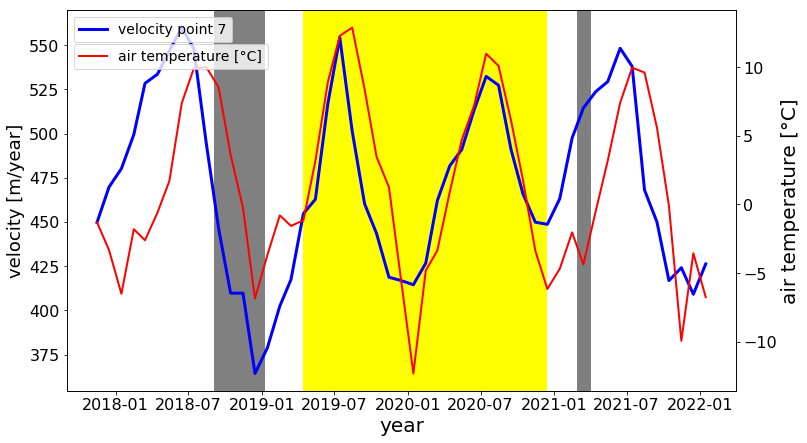

In [9]:
fig,ax=plt.subplots(figsize=(12,7))

## set gray regions for volcanic active periods

for item in range(0,len(data_climate_split)):
    plt.axvspan(event_2021_start,event_2021_end,facecolor='grey',alpha=0.5)
    plt.axvspan(event_2018_start,event_2018_end,facecolor='grey',alpha=0.5)
    plt.axvspan(no_activity_start,no_activity_end,facecolor='yellow',alpha=0.5)

## plot velocity
ax.plot(data_timeseries['velocity'],color='b',linewidth=3,label=label_on_graph)
ax.set_xlabel('year',fontsize=20)
plt.xticks(fontsize=16)
ax.set_ylabel('velocity [m/year]',fontsize=18)
plt.yticks(fontsize=16)
ax.legend(loc=2,bbox_to_anchor=(0,1),prop={'size': 14})

## make twin axis
ax2=ax.twinx()

## plot climate data

#ax2.plot(data_timeseries['climate_data'],color='r',linewidth=3,label=data_label)
#ax2.set_ylabel(data_label,fontsize=20)

plt.yticks(fontsize=16)
ax2.legend(loc=2,bbox_to_anchor=(0,0.93),prop={'size': 14})


calculate correlation between surface velocity and temperature/precipitation

 
4.621 x + 465.8


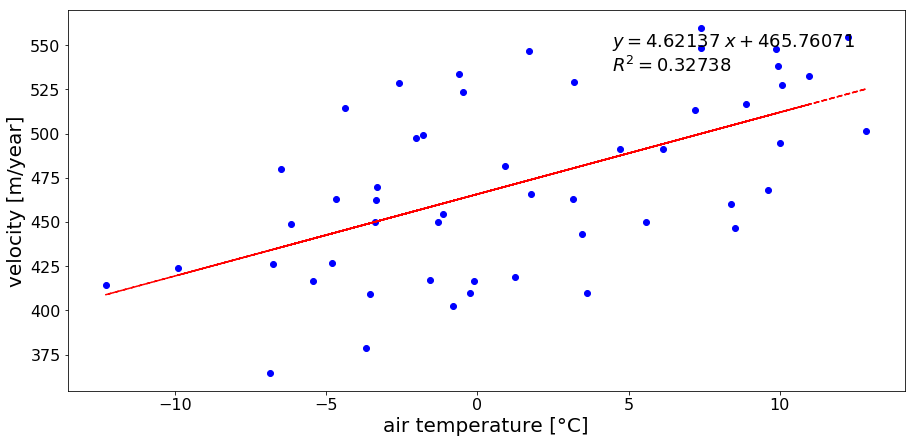

In [10]:
## make scatter plot of temperature (or precipitation) and velocity 
fig,ax=plt.subplots(figsize=(15,7))
ax.scatter(data_timeseries['climate_data'],data_timeseries['velocity'],color='b')

## fit polynomial to scatter plot
z = np.polyfit(data_timeseries['climate_data'],data_timeseries['velocity'], 1)
p = np.poly1d(z)
p_eval = np.poly1d(z)
p_eval = np.poly1d(z)(data_timeseries['climate_data'])
plt.plot(data_timeseries['climate_data'],p(data_timeseries['climate_data']),"r--")

## add correlation coefficient and polynomial equation to plot
text = f"$y={z[0]:0.5f}\;x{z[1]:+0.5f}$\n$R^2 = {r2_score(data_timeseries['velocity'],p_eval):0.5f}$"
plt.gca().text(0.65, 0.95, text,transform=plt.gca().transAxes,
     fontsize=18, verticalalignment='top')


## set x, y label and fontsizes
ax.set_xlabel(data_label,fontsize=20)
plt.xticks(fontsize=16)
ax.set_ylabel('velocity [m/year]',fontsize=20)
plt.yticks(fontsize=16)

print(p)



correlation coefficients for all 10 points (both temperature and precipitation vs velocity) and average correlation values

0.12102300000000002
0.294874
0.173851
0.10153799999999999
0.11932000000000001
0.01778200000000002


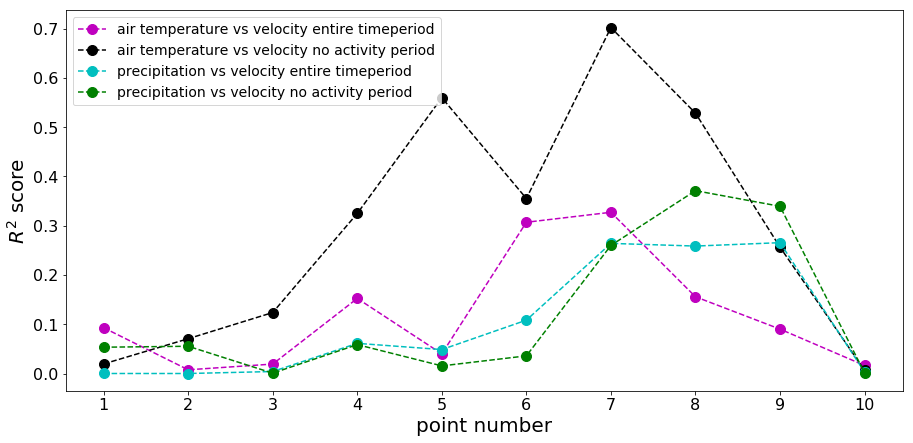

In [11]:
points = np.arange(1,11)

## r2 score values for temperature vs velocity for entire period and no-activity period

r2_score_entire_period_temp = [0.09309,0.00777,0.01938,0.15258,0.04012,0.30713,0.32738,0.15594,0.09029,0.01655]
r2_score_no_activity_temp = [0.01964,0.07082,0.12395,0.32506,0.55993,0.35533,0.70220,0.52858,0.25667,0.00656]

## r2 score values for precipitation vs velocity for entire period and no-activity period

r2_score_entire_period_precip = [0.00025,0.00023,0.00425,0.06143,0.04880,0.10847,0.26427,0.25884,0.26571,0.00313]
r2_score_no_activity_precip = [0.05359,0.05552,0.00091,0.05884,0.01568,0.03601,0.26019,0.37127,0.33952,0.00167]

## calculate average correlation values for temperature vs velocity and difference no-activity period to entire time period
avg_r2_score_entire_period_temp=np.asarray(r2_score_entire_period_temp).mean()
avg_r2_score_no_activity_temp=np.asarray(r2_score_no_activity_temp).mean()
difference_temp = avg_r2_score_no_activity_temp-avg_r2_score_entire_period_temp

## calculate average correlation values for precipitation vs velocity and difference no-activity period to entire time period
avg_r2_score_entire_period_precip=np.asarray(r2_score_entire_period_precip).mean()
avg_r2_score_no_activity_precip=np.asarray(r2_score_no_activity_precip).mean()
difference_precip = avg_r2_score_no_activity_precip-avg_r2_score_entire_period_precip

## plot all r2 scores for entire time period and no-activity time period
fig,ax=plt.subplots(figsize=(15,7))
plt.plot(points,r2_score_entire_period_temp,"m--",marker='o',markersize=10,label='air temperature vs velocity entire timeperiod')
plt.plot(points,r2_score_no_activity_temp,"k--",marker='o',markersize=10,label='air temperature vs velocity no activity period')
plt.plot(points,r2_score_entire_period_precip,"c--",marker='o',markersize=10,label='precipitation vs velocity entire timeperiod')
plt.plot(points,r2_score_no_activity_precip,"g--",marker='o',markersize=10,label='precipitation vs velocity no activity period')

ax.set_xlabel('point number',fontsize=20)
plt.xticks(np.arange(min(points), max(points)+1, 1.0),fontsize=16)
ax.set_ylabel('$R^2$ score',fontsize=20)
plt.yticks(fontsize=16)

ax.legend(loc=2,bbox_to_anchor=(0,1),prop={'size': 14})

## print average correlation values for entire time period and no-activity period for temperature vs velocity
print(avg_r2_score_entire_period_temp)
print(avg_r2_score_no_activity_temp)
print(difference_temp)

## print average correlation values for entire time period and no-activity period for precipitation vs velocity
print(avg_r2_score_entire_period_precip)
print(avg_r2_score_no_activity_precip)
print(difference_precip)